# Breast Cancer Prediction
Predict whether a patient has a benign or malignant cancer. It shall be separated into two. Model development and EDA.

# EDA
Explore the data and get it ready for model development. Cleaning, feature engineering and visualizing the data.

## Import the necessary modules

In [42]:
# Basic libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pt
from pandas_profiling import ProfileReport

#Basic imputation libraries

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from missingpy import MissForest

## Import the data

In [43]:
breast = pd.read_csv('data.csv')

In [44]:
# Inspect the data
breast.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Explore the data


In [45]:
breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [46]:
#Diagnosis
breast.diagnosis.value_counts(normalize = True) * 100

B    62.741652
M    37.258348
Name: diagnosis, dtype: float64

In [47]:
# Feature Engineer
breast['diagnosis'] = breast['diagnosis'].replace(['B', 'M'], [1, 0])

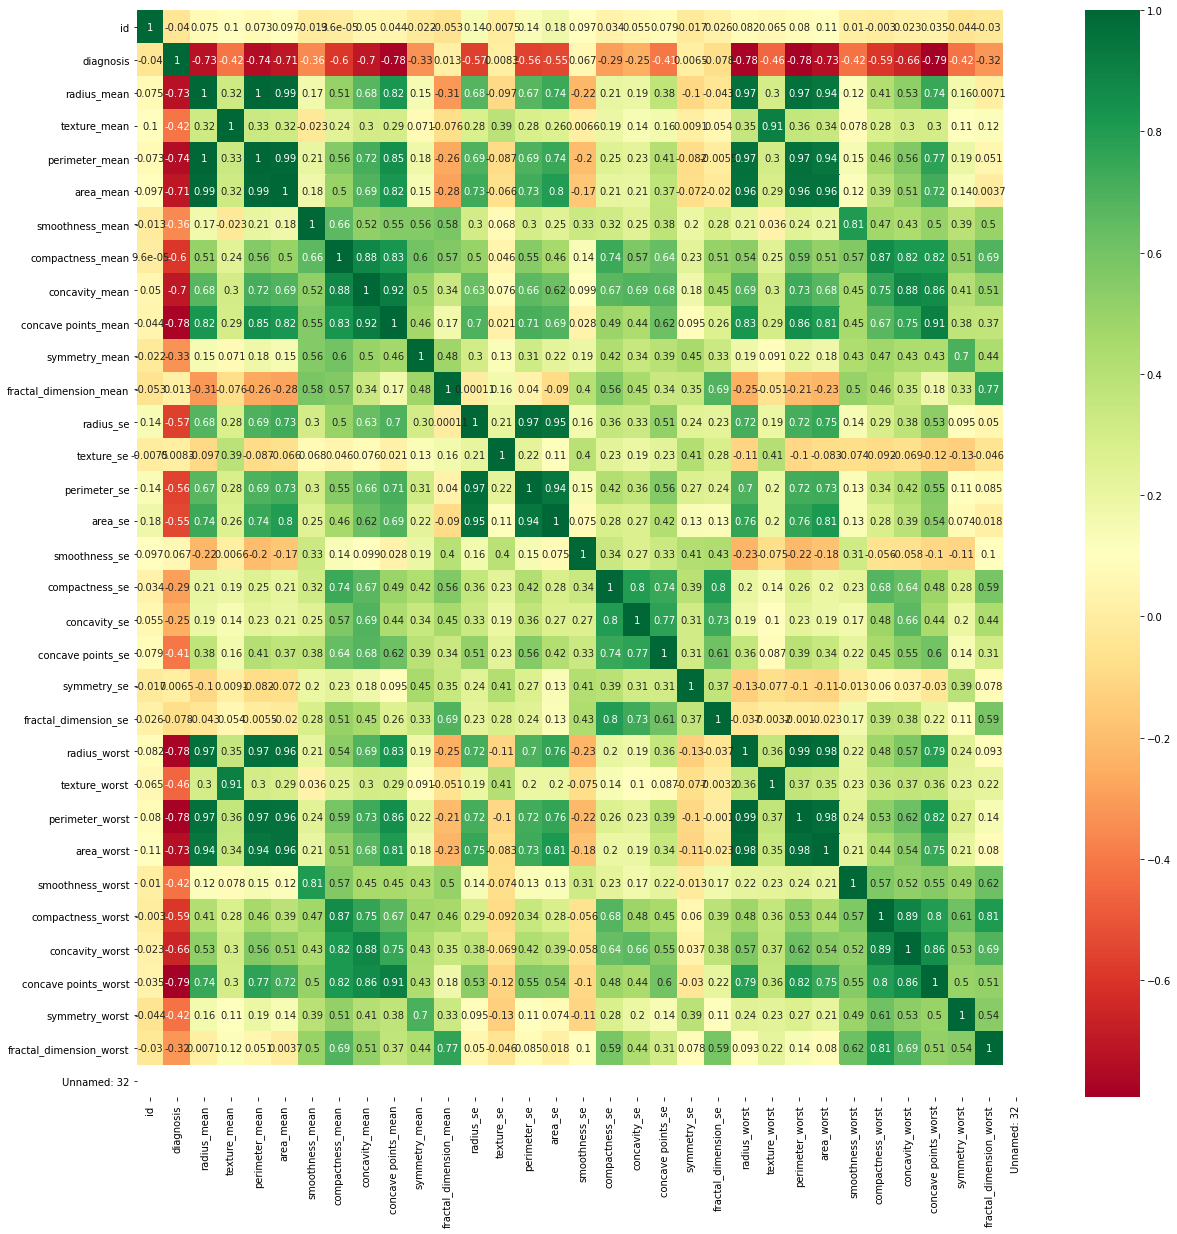

In [48]:
# Heat Map
#correlation matrix
x = breast.iloc[:,:]  #independent columns
y = breast.iloc[:,1]    #target column i.e total casestrain_new
#get correlations of each features in dataset
corrmat = breast.iloc[:, :].corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(breast[top_corr_features].iloc[:, :].corr(),annot=True,cmap="RdYlGn")

## PCA

In [49]:
# Drop unnamed and ID

breast.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

In [50]:
breast.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [51]:
# Split into X and y

X = breast.drop('diagnosis', axis = 1)

y = breast['diagnosis']

In [52]:
# Standardize the dataset
columns = X.columns

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_final = pd.DataFrame(X_scaled, columns = columns )

In [54]:
X_final.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


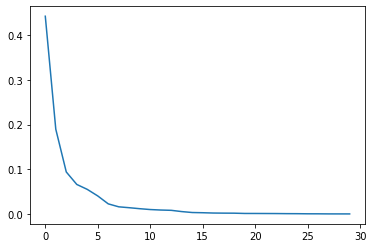

In [55]:
pca = PCA()

pca.fit(X_final)

variance_ratio = pca.explained_variance_ratio_

plt.plot(variance_ratio)

In [57]:
#Do pca to keep 5 components
pca_modified = PCA(n_components= 5)

X_reduced = pca_modified.fit_transform(X_final)

# Model development 

## Import the necessary modules 

In [61]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier

In [62]:
#Define models
lr = LogisticRegression()

dt = DecisionTreeClassifier()

ada = AdaBoostClassifier()

rf = RandomForestClassifier()

gbc = GradientBoostingClassifier()

cat = CatBoostClassifier()

models =[lr, dt, ada, rf, gbc, cat]


In [63]:
# split the data

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size = 0.2, random_state = 42, stratify = y)

In [64]:
#cross_val_score 
score = []
for model in models:
    scores = cross_val_score(model, X_train, y_train, scoring = 'f1', cv = 5)
    score.append(scores.mean())

print(score)


2s	remaining: 2.37s
617:	learn: 0.0237341	total: 3.83s	remaining: 2.37s
618:	learn: 0.0236801	total: 3.83s	remaining: 2.36s
619:	learn: 0.0236493	total: 3.84s	remaining: 2.35s
620:	learn: 0.0236120	total: 3.84s	remaining: 2.35s
621:	learn: 0.0235691	total: 3.85s	remaining: 2.34s
622:	learn: 0.0235204	total: 3.85s	remaining: 2.33s
623:	learn: 0.0234387	total: 3.86s	remaining: 2.33s
624:	learn: 0.0233879	total: 3.87s	remaining: 2.32s
625:	learn: 0.0233332	total: 3.87s	remaining: 2.31s
626:	learn: 0.0232728	total: 3.88s	remaining: 2.31s
627:	learn: 0.0232243	total: 3.88s	remaining: 2.3s
628:	learn: 0.0231600	total: 3.89s	remaining: 2.29s
629:	learn: 0.0231082	total: 3.9s	remaining: 2.29s
630:	learn: 0.0230487	total: 3.9s	remaining: 2.28s
631:	learn: 0.0229942	total: 3.91s	remaining: 2.27s
632:	learn: 0.0229220	total: 3.91s	remaining: 2.27s
633:	learn: 0.0228685	total: 3.92s	remaining: 2.26s
634:	learn: 0.0228230	total: 3.93s	remaining: 2.26s
635:	learn: 0.0227777	total: 3.93s	remaining: 2

In [65]:
print(score)

[0.9843438445612358, 0.9380552562294528, 0.9757946107271295, 0.9650852516300764, 0.9668281357392553, 0.9826342150005096]


In [68]:
#Test LR as it is the best model
from sklearn.metrics import classification_report

lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

print(classification_report(y_test, predictions))

precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

